<a href="https://colab.research.google.com/github/madara1128/Image-Classification-For-Cinnamon-/blob/main/cinnemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📦 Installed Libraries and Their Uses

- **numpy** - Used to convert image data into array format for numerical processing.

- **pandas** - Helps manage and manipulate datasets in table (DataFrame) format.

- **matplotlib** - Used to visualize images and data using graphs and charts.

- **tensorflow** - A deep learning library used to build, train, and evaluate machine learning models.

- **opendatasets** - Allows you to easily download datasets from Kaggle using simple commands.


In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets



In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

### 📥 Download Cinnamon Dataset from Kaggle






In [ ]:
od.download("https://www.kaggle.com/datasets/madaraweerasingha/ceylon-and-cassia-cinnemon/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madaraweerasingha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/madaraweerasingha/ceylon-and-cassia-cinnemon


100%|██████████| 13.2M/13.2M [00:00<00:00, 501MB/s]

### ⚙️ Set Batch Size and Image Size


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE =(128,128)

### 📂 Set Training and Testing Data Directories


In [ ]:
train_data_dir="/content/ceylon-and-cassia-cinnemon/cinnemon_dataset/train"
test_data_dir="/content/ceylon-and-cassia-cinnemon/cinnemon_dataset/test"

### 📊 Load Training, Validation, and Test Datasets


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='training',validation_split=0.1,seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='validation',validation_split=0.1,seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE)

Found 36 files belonging to 2 classes.
Using 33 files for training.
Found 36 files belonging to 2 classes.
Using 3 files for validation.
Found 16 files belonging to 2 classes.


### 📊 Load Training, Validation, and Test Datasets


In [ ]:
class_names = train_data.class_names
class_names

['cassia', 'ceylon']

### 🔍 Check Shape of a Batch from Training Data


In [ ]:
for image_batch, lable_batch in train_data.take(1):
  print(image_batch.shape)
  print(lable_batch.shape)

(32, 128, 128, 3)
(32,)


### 🖼️ Plot Sample Images from Training Data


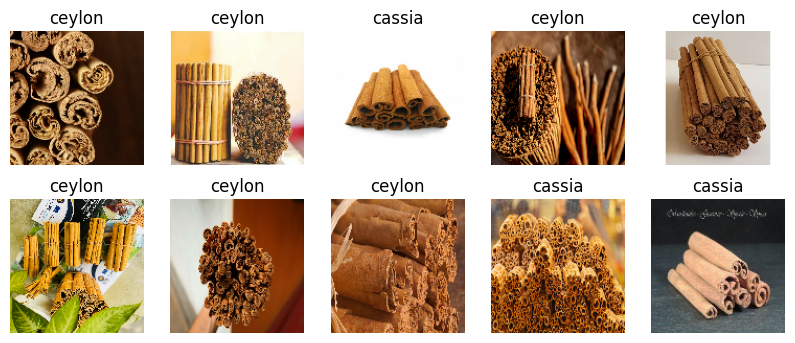

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,lable in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[lable[i]])
    plt.axis('off')

### 🧾 Display Raw Pixel Data of One Image


In [ ]:
for image,lable in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[1.73000000e+02 1.66000000e+02 1.74000000e+02]
   [1.74000000e+02 1.67000000e+02 1.75000000e+02]
   [1.76500000e+02 1.66500000e+02 1.74500000e+02]
   ...
   [1.79500000e+02 1.72500000e+02 1.80500000e+02]
   [1.79000000e+02 1.72000000e+02 1.80000000e+02]
   [1.78500000e+02 1.71500000e+02 1.79500000e+02]]

  [[1.73000000e+02 1.66000000e+02 1.74000000e+02]
   [1.74500000e+02 1.67500000e+02 1.75500000e+02]
   [1.77000000e+02 1.67000000e+02 1.75000000e+02]
   ...
   [1.77000000e+02 1.70000000e+02 1.78000000e+02]
   [1.79000000e+02 1.72000000e+02 1.80000000e+02]
   [1.77000000e+02 1.70000000e+02 1.78000000e+02]]

  [[1.76000000e+02 1.66000000e+02 1.75000000e+02]
   [1.77000000e+02 1.67000000e+02 1.76000000e+02]
   [1.78000000e+02 1.68000000e+02 1.76000000e+02]
   ...
   [1.76000000e+02 1.71000000e+02 1.78000000e+02]
   [1.77000000e+02 1.70000000e+02 1.78000000e+02]
   [1.77000000e+02 1.70000000e+02 1.78000000e+02]]

  ...

  [[9.75000000e+01 5.95000000e+01 3.65000000e+01]
   [9

### ⚙️ Normalize Image Pixel Values


In [ ]:
train_data = train_data.map(lambda x, y: (x / 255.0, y))
validation_data = validation_data.map(lambda x, y: (x / 255.0, y))
test_data = test_data.map(lambda x, y: (x / 255.0, y))


### 🧾 View Normalized Pixel Data of One Image


In [ ]:
for image,lable in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.84428626e-01 2.42700681e-01 2.29833022e-01]
   [2.69362748e-01 2.30759799e-01 2.22610295e-01]
   [3.98115814e-01 3.11450660e-01 2.56564021e-01]
   ...
   [4.16337311e-01 3.77121627e-01 3.72709870e-01]
   [4.84704345e-01 4.37645525e-01 4.37645525e-01]
   [5.52267134e-01 5.16973019e-01 4.97365206e-01]]

  [[3.57536763e-01 2.63181686e-01 2.38549322e-01]
   [3.02742034e-01 2.59497553e-01 2.40762874e-01]
   [4.00030643e-01 3.24364275e-01 2.77910531e-01]
   ...
   [4.33754593e-01 3.99938732e-01 3.90625000e-01]
   [4.18612123e-01 3.79028797e-01 3.53952199e-01]
   [5.06403208e-01 4.76011038e-01 4.49050248e-01]]

  [[4.31081504e-01 2.90969670e-01 2.33923107e-01]
   [5.28492630e-01 3.90372247e-01 3.38066787e-01]
   [5.08762240e-01 3.83272052e-01 3.32291663e-01]
   ...
   [3.84995401e-01 3.30093443e-01 3.24578732e-01]
   [4.12178308e-01 3.69041055e-01 3.45511645e-01]
   [4.23000932e-01 3.79863650e-01 3.56334239e-01]]

  ...

  [[8.19607854e-01 7.45098054e-01 5.88235319e-01]
   [8

### 🔄 Define Data Augmentation Pipeline


In [ ]:
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 🧠 Build the CNN Model for Cinnamon Classification


In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

### 📋 View Model Architecture Summary


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

### ⚙️ Compile the Model with Optimizer, Loss, and Metrics


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)


### 🏋️‍♂️ Train the Model and Measure Training Time


In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.3062 - loss: 0.7770 - val_accuracy: 0.3333 - val_loss: 0.8412
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5818 - loss: 0.8441 - val_accuracy: 0.3333 - val_loss: 0.7259
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6124 - loss: 0.6854 - val_accuracy: 0.3333 - val_loss: 0.7363
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6020 - loss: 0.6476 - val_accuracy: 0.3333 - val_loss: 0.7601
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6020 - loss: 0.6397 - val_accuracy: 0.3333 - val_loss: 0.7292
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6430 - loss: 0.6348 - val_accuracy: 0.6667 - val_loss: 0.6861
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7244 - loss: 0.5819 - val_accuracy: 0.6667 - val_loss: 0.6640
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6326 - loss: 0.6427 - val_accuracy: 0.6667 - val_loss: 0.6573

### 📈 View Training History (Loss and Accuracy per Epoch)


In [ ]:
history.history

{'accuracy': [0.3030303120613098,
  0.5757575631141663,
  0.6060606241226196,
  0.6060606241226196,
  0.6060606241226196,
  0.6363636255264282,
  0.7272727489471436,
  0.6363636255264282,
  0.7272727489471436,
  0.6363636255264282,
  0.6969696879386902,
  0.7575757503509521,
  0.6666666865348816,
  0.6363636255264282,
  0.6363636255264282,
  0.5454545617103577,
  0.6969696879386902,
  0.7575757503509521,
  0.6969696879386902,
  0.7575757503509521],
 'loss': [0.7767467498779297,
  0.8533945083618164,
  0.6874764561653137,
  0.6422054171562195,
  0.6343255043029785,
  0.6408056020736694,
  0.5830203294754028,
  0.6360548138618469,
  0.5930395722389221,
  0.80711430311203,
  0.5995112657546997,
  0.4944759011268616,
  0.5445839762687683,
  0.5369488000869751,
  0.5715693235397339,
  0.5995305180549622,
  0.49295541644096375,
  0.517055869102478,
  0.549987256526947,
  0.5527117252349854],
 'val_accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.333333343267440

### 📊 Plot Training and Validation Accuracy


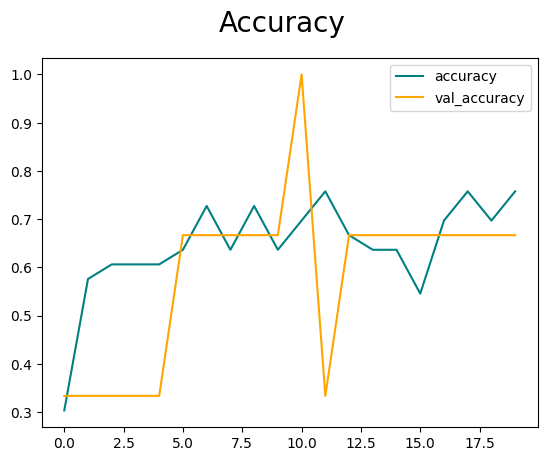

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


### 📉 Plot Training and Validation Loss


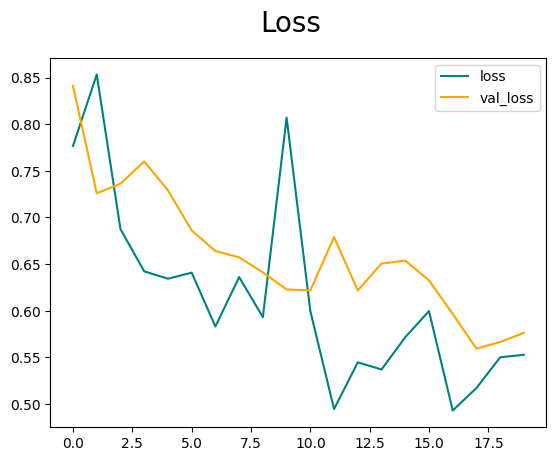

In [ ]:

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()


### 🧪 Define Evaluation Metrics: Precision, Recall, and Accuracy


In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()



### ✅ Evaluate Model on Test Data Using Custom Metrics


In [ ]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


### 🎯 Get Final Precision Score on Test Data


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5625>

### 📌 Get Final Recall Score on Test Data


In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### 📏 Get Final Accuracy Score on Test Data


In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5625>

### 🛠️ Install OpenCV Library for Image Processing


In [ ]:
!pip install opencv-python

### 🧿 Import OpenCV for Image Processing


In [ ]:
import cv2

### 🖼️ Load and Display an Image Using OpenCV and Matplotlib


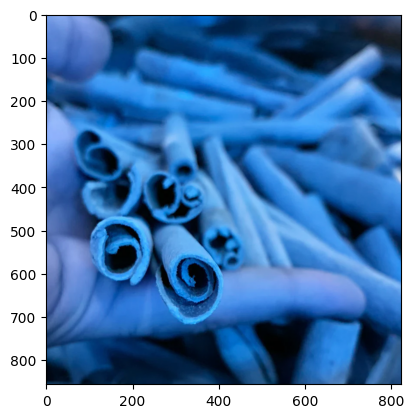

In [ ]:
image = cv2.imread("/content/ceylon-and-cassia-cinnemon/cinnemon_dataset/train/cassia/5412D434-A651-4B65-A769-57AFA4065589_24f559f1-5068-4c66-bd67-041d2d270237_824x.webp")
plt.imshow(image)
plt.show()

### 🔄 Resize and Normalize Image for Model Input


In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

### 🧮 View Normalized Image Tensor


In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[4.82352942e-01, 6.39215708e-01, 9.17647064e-01],
        [4.82352942e-01, 6.39215708e-01, 9.17647064e-01],
        [4.91286099e-01, 6.41518295e-01, 9.21923339e-01],
        ...,
        [2.53811955e-01, 3.65165442e-01, 5.44960201e-01],
        [2.59327620e-01, 3.70326370e-01, 5.50121129e-01],
        [2.79196829e-01, 3.89000744e-01, 5.69392920e-01]],

       [[4.66666669e-01, 6.19607866e-01, 9.09803927e-01],
        [4.66666669e-01, 6.20220602e-01, 9.08578455e-01],
        [4.78500783e-01, 6.27650142e-01, 9.06081498e-01],
        ...,
        [2.40808830e-01, 3.23552877e-01, 4.82543945e-01],
        [2.58823544e-01, 3.46890330e-01, 4.95572925e-01],
        [2.80560672e-01, 3.72549027e-01, 5.13388455e-01]],

       [[4.38281238e-01, 6.02987111e-01, 9.04947937e-01],
        [4.42202806e-01, 5.99065542e-01, 8.96170318e-01],
        [4.57889080e-01, 5.97472429e-01, 8.92068326e-01],
        ...,
        [2.32970953e-01, 2.98697

### ➕ Add Batch Dimension to Image Tensor


In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

### 🤖 Predict Class of Single Image Using the Model


In [ ]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


### 🔍 View Model Prediction Output


In [ ]:
y_hat

array([[0.6085098]], dtype=float32)

### 🏷️ Display Class Names of the Dataset



In [ ]:
class_names

['cassia', 'ceylon']

### 🔥 Interpret Prediction Based on Threshold


In [ ]:
if y_hat.item() >= 0.5:
    print(class_names[1])
else:
    print(class_names[0])


ceylon
